<a href="https://colab.research.google.com/github/katelyndiaz/KWK_DS2021/blob/main/6_29_21_ANSWER_KEY_KWK_2021_Stats_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📈 **Intermediate Stats** 📈 

First, go to `file > save a copy in drive`. This will make a new copy of this notebook. Next, open your new notebook and go to `edit > clear all outputs`. This will make sure that when you run your code, the output is not already shown. 


## 🎯 **Learning Goals**

- Understand and interpret the various measures of correlation 
- Understand the mathematical and probabilistic foundations of statistical inference
- Make basic plots of data using Pandas/Matplotlib
- Understand how to choose the right graph for your data


## 📗 **Technical Vocabulary** 
- Measures of Correlation 
- Covariance 
- Correlation Coefficient
- Covariance Matrix
- Statistical Inference
- Sample vs Population 
- Correlation Coefficient Matrix 
- The Normal Distribution 
- Box Plot
- Pie Chart
- Histograph
- Bar Chart
- Line Graph






## **Importing Packages**

In [ ]:
# importing packages 
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

## **Importing Data**

Upload the [Spotify dataset](https://drive.google.com/drive/u/0/search?q=spotify) into Google Colab using the panel on the left side. Make sure the name of your file matches the name in your code.

In [ ]:
# import data
url = 'https://raw.githubusercontent.com/mikaela-el/repo/master/kwk_spotify.csv'
spotify = pd.read_csv(url)

# preview data 
spotify.head()

,song_id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


## 🤔 **Statistical Inference**



### **Sample vs. Population**
Statistical inference is just the process of understanding something about a population based on a smaller sample taken from the population.

The population contains all samples of interest while a sample is a smaller subset of the population taken (hopefully) randomly. The goal is to get a sample that is representative of the population so that when we take some measurement on the sample, we can infer that it's true for the entire population. This is called statistical inference.



### **How do we make an inference?**
We assume that the information we are interested in (e.g. height) about the population can be described with an underlying probability distribution. A probability distribution is a mathematical function that describes the probability of occurrence of all possible outcomes.

We generally want to know what the parameters of that distribution are. A parameter is a numerical characteristic of the probability distribution. In order to make inferences about the population parameters, we calculate a statistic based on the sample. We then use the statistic to make an inference about the parameter.

Example: We want to know what the average height of people living in New York.

We take a sample of the population (all people living in New York).
We can calculate the average height for our sample. This calculated average is now the statistic that estimates the population parameter.


##  🧮 **Measures of Correlation**

The descriptive statistics that we've studied so far give us ways to summarize aspects of a single column of data. _Covariance_ and _correlation_ are ways to summarize how two columns of data interact with each other. 

*   **Positive correlation** exists when larger values of 𝑥 correspond to larger values of 𝑦 and vice versa.
*   **Negative correlation** exists when larger values of 𝑥 correspond to smaller values of 𝑦 and vice versa.
*   **Weak or no correlation** exists if there is no such apparent relationship.



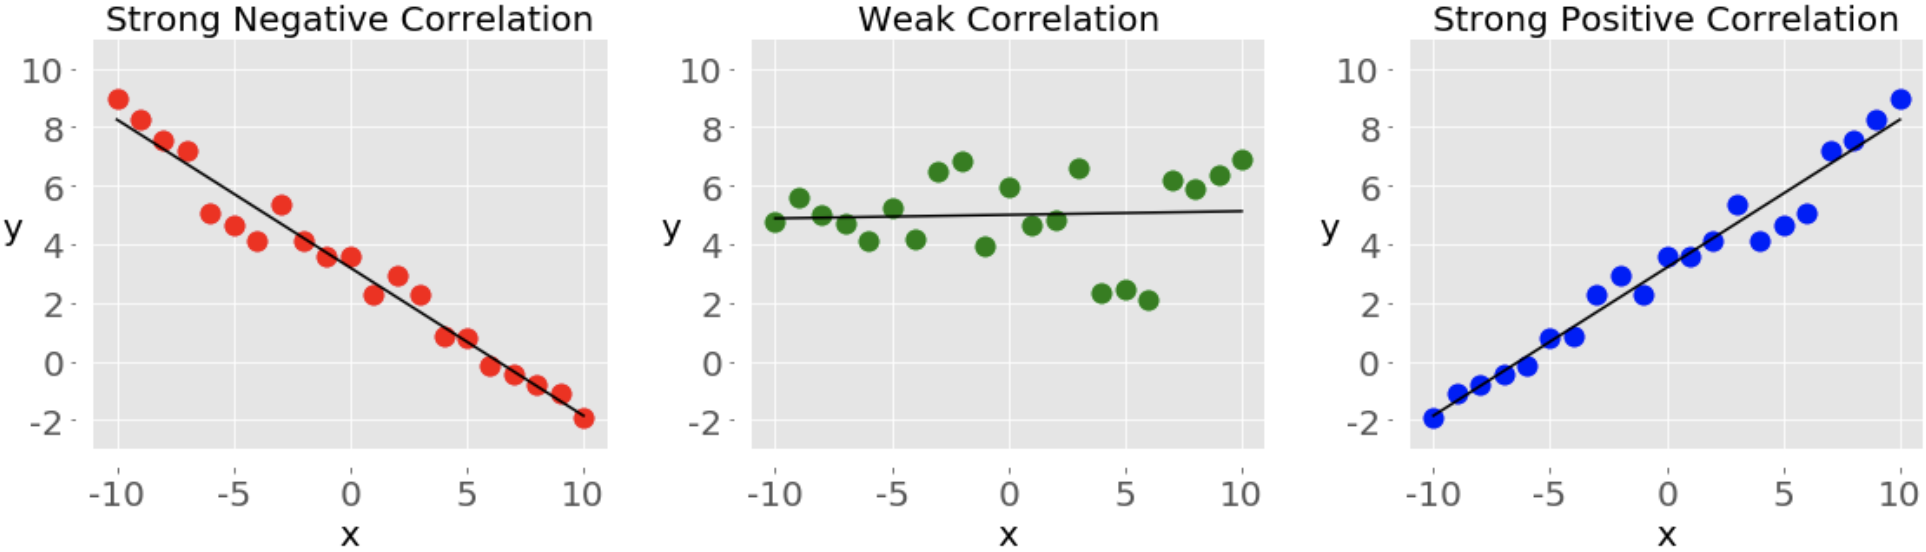

## 📏 **Covariance Coefficient** 

Covariance is when two variables vary with each other, whereas Correlation is when the change in one variable results in the change in another variable [(source)](https://www.mygreatlearning.com/blog/covariance-vs-correlation/#:~:text=Covariance%20is%20when%20two%20variables,the%20change%20in%20another%20variable.).







### **Sample Covariance**

*   If the **correlation is positive**, then the covariance is positive, as well. A stronger relationship corresponds to a higher value of the covariance.
*   If the **correlation is negative**, then the covariance is negative, as well. A stronger relationship corresponds to a lower (or higher absolute) value of the covariance.
*   If the **correlation is weak**, then the covariance is close to zero.



### **Covariance Matrix**

The covariance is defined pairwise -- that is, there is only a covariance between _pairs_ of variables. 

To look at covariances within an entire dataset, we can use something called the _covariance matrix_. Pandas gives you a covariance matrix of a data frame using the `df.cov()` function:

In [ ]:
# find the covariance of the spotify dataset
spotify.cov()

,song_id,year,bpm,nrgy,dnce,loudness,live,val,dur,acous,spch,pop
song_id,30351.000000,449.207641,-496.116279,-609.760797,174.621262,-65.277409,-296.438538,-505.961794,-1253.310631,349.181063,17.823920,380.445183
year,449.207641,6.796747,-6.738839,-9.592990,2.764822,-0.922555,-4.656948,-7.161989,-19.161063,5.507256,0.093222,9.131395
bpm,-496.116279,-6.738839,614.809794,51.026804,-43.556385,12.756505,26.503658,8.943186,-24.845617,-58.316419,10.947092,6.833355
nrgy,-609.760797,-9.592990,51.026804,266.037773,36.487626,24.531473,39.907913,150.397734,-79.945494,-190.452353,13.098180,-13.650003
dnce,174.621262,2.764822,-43.556385,36.487626,178.990088,8.728470,-5.048757,151.108557,-80.748448,-66.695705,-2.807359,22.541118
loudness,-65.277409,-0.922555,12.756505,24.531473,8.728470,7.828917,3.003799,17.821783,-10.000730,-11.063093,-0.023231,6.373313
live,-296.438538,-4.656948,26.503658,39.907913,-5.048757,3.003799,171.676622,5.966235,43.976403,-26.710247,14.129097,-14.408938
val,-505.961794,-7.161989,8.943186,150.397734,151.108557,17.821783,5.966235,506.836091,-201.509625,-116.427627,20.555288,12.731197
dur,-1253.310631,-19.161063,-24.845617,-79.945494,-80.748448,-10.000730,43.976403,-201.509625,1164.860950,65.064839,13.935563,-51.710859
acous,349.181063,5.507256,-58.316419,-190.452353,-66.695705,-11.063093,-26.710247,-116.427627,65.064839,431.233621,0.429290,8.050525


*Interpretation: 'nrgy' and 'bpm' have a positive coefficient which means they tend to increase together. Therefor, as 'nrgy' increases, so will the 'bpm'.*

You can use the covariance to determine the direction of a linear relationship between two variables as follows:

- If both variables tend to increase or decrease together, the coefficient is positive.
- If one variable tends to increase as the other decreases, the coefficient is negative.

Covariance is similar to correlation but when the covariance is calculated, the data are not standardized. Therefore, the covariance is expressed in units that vary with the data and is not converted to a standardized scale of −1 to +1. Because the data are not standardized, you cannot use the covariance statistic to assess the strength of a linear relationship. To assess the strength of a relationship between two variables using a standardized scale of -1 to +1, use Correlation [(source)](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/covariance/interpret-the-results/).


### **Correlation Coefficient Matrix**

Correlation coefficient formulas are used to find how strong a relationship is between data. The formulas return a value between -1 and 1, where:

- 1 indicates a strong positive relationship.
- -1 indicates a strong negative relationship.
A result of zero indicates no relationship at all.

Sometimes this number is called *Pearson's correlation coefficient*.

The output number is always between 1 and -1. A correlation of 1 corresponds to a perfect linear relationship with a positive slope, and a correlation of -1 corresponds to a perfect linear relationship with a negative slope.


In [ ]:
# find the correlation matrix
spotify.corr()

,song_id,year,bpm,nrgy,dnce,loudness,live,val,dur,acous,spch,pop
song_id,1.000000,0.989031,-0.114849,-0.214586,0.074920,-0.133914,-0.129865,-0.129002,-0.210783,0.096518,0.013672,0.150420
year,0.989031,1.000000,-0.104247,-0.225596,0.079269,-0.126471,-0.136331,-0.122025,-0.215344,0.101725,0.004778,0.241261
bpm,-0.114849,-0.104247,1.000000,0.126170,-0.131301,0.183870,0.081579,0.016021,-0.029359,-0.113257,0.058999,0.018983
nrgy,-0.214586,-0.225596,0.126170,1.000000,0.167209,0.537528,0.186738,0.409577,-0.143610,-0.562287,0.107313,-0.057645
dnce,0.074920,0.079269,-0.131301,0.167209,1.000000,0.233170,-0.028801,0.501696,-0.176841,-0.240064,-0.028041,0.116054
loudness,-0.133914,-0.126471,0.183870,0.537528,0.233170,1.000000,0.081934,0.282922,-0.104723,-0.190401,-0.001110,0.156897
live,-0.129865,-0.136331,0.081579,0.186738,-0.028801,0.081934,1.000000,0.020226,0.098339,-0.098167,0.144103,-0.075749
val,-0.129002,-0.122025,0.016021,0.409577,0.501696,0.282922,0.020226,1.000000,-0.262256,-0.249038,0.122013,0.038953
dur,-0.210783,-0.215344,-0.029359,-0.143610,-0.176841,-0.104723,0.098339,-0.262256,1.000000,0.091802,0.054564,-0.104363
acous,0.096518,0.101725,-0.113257,-0.562287,-0.240064,-0.190401,-0.098167,-0.249038,0.091802,1.000000,0.002763,0.026704


We can use the correlation matrix above to learn a lot about the relationships between our variables. For example, `valence` and `danceability` have a moderate and positive linear relationship (0.50). 

However, that's a lot of numbers to look at. Fortunately, we can visualize this using a heatmap. Let's use Seaborn to make a heatmap. 

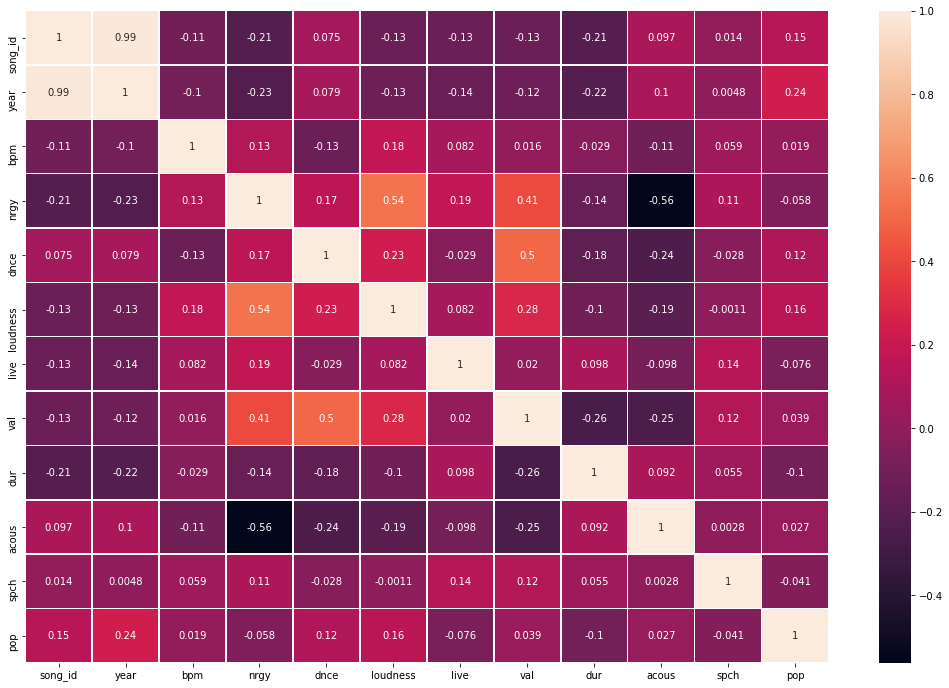

In [ ]:
# create a correlation matrix 
import seaborn as sns

# set the figure size 
plt.subplots(figsize=(18, 12))

# create var for matrix 
corr = spotify.corr()

# plot the cor matrix 
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=.5,annot=True)

#change the color palette
sns.color_palette("coolwarm", as_cmap=True)

# looking at the color scale, what do you notice?

Interpreting the Heatmap: 
- **We notice that the diagonal entries are all 1, because each column is maximally correlated with itself.**   
- The correlation between `loudness` and `nrgy` is 0.54, which is moderate to strong. 
- This means the values in those columns tend to move together (i.e.: there is a moderate to strong linear relation between loudness and energy).

## 🔔 **The Normal Distribution** 

<br>

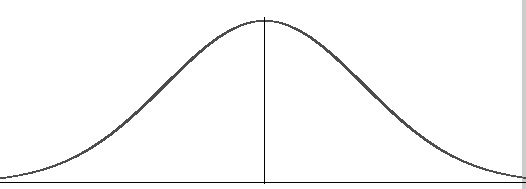

<br>

A [normal distribution](https://www.statisticshowto.com/probability-and-statistics/normal-distributions/), sometimes called the bell curve, is a distribution that occurs naturally in many situations. For example, the bell curve is seen in tests like the SAT and GRE. The bulk of students will score the average (C), while smaller numbers of students will score a B or D. An even smaller percentage of students score an F or an A. This creates a distribution that resembles a bell (hence the nickname). The bell curve is symmetrical. Half of the data will fall to the left of the mean; half will fall to the right.
Many groups follow this type of pattern. That’s why it’s widely used in business, statistics and in government bodies like the FDA:
- Heights of people.
- Measurement errors.
- Blood pressure.
- Points on a test.
- IQ scores.
- Salaries.

One of the best things about working in python, especially with packages like `numpy` and `scipy`, is that many of the equations are built in. 

#### **Properties of a Normal Distribution**
- The mean, mode and median are all equal.
- The curve is symmetric at the center (i.e. around the mean, eg. 34.1% on the left of the mean and 34.1% on the right of the mean).
- Exactly half of the values are to the left of center and exactly half the values are to the right.
- The total area under the curve is 1 (the sum of the percentages under the curve = 100%).

<br>

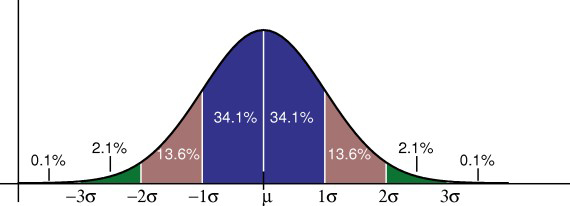

<br>

**The empirical rule tells you what percentage of your data falls within a certain number of standard deviations from the mean:**
- 68% of the data falls within one standard deviation of the mean (data in the blue blocks).
- 95% of the data falls within two standard deviations of the mean (data in the blue and brown blocks).
- 99.7% of the data falls within three standard deviations of the mean (data in the blue, brown and green blocks).




**Example: Heights**

Let's say that I know that the average height in New York is 170cm and the standard deviation is 20cm. If we assume that the height in New York can be represented with a normal distribution, it would look like the following:

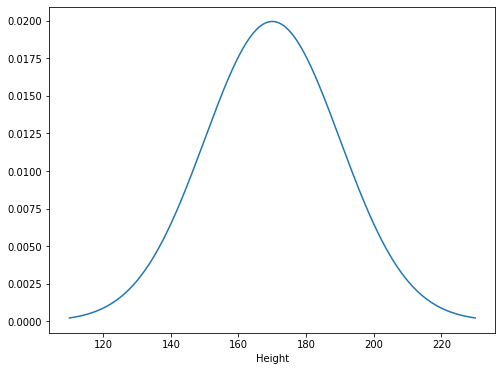

In [ ]:
# import our stats libary 
from scipy.stats import norm

# create variable for mean
mean = 170
# create variable for stdev 
sdev = 20
# create variable for xvals and return evenly spaced values within a given interval (110-230).
xvals = np.arange(110, 230, 0.01)

# plt.figure sets up a figure object
plt.figure()
# plt.plot determines the type of plot we are creating and takes in the data needed
plt.plot(xvals, norm.pdf(xvals, loc = mean, scale = sdev))
# labeling our x axis 
plt.xlabel('Height')
# plt.show shows the figure on screen
plt.show()

A probability distribution can give us some very useful information. 

For our example of heights in New York, the area under the curve between two values (160cm and 180cm) represents the probability that any person selected from the population will have a height between those values. As we go further to the edges of the curve, it becomes less likely that a person will be those heights. 

This allows to make many conclusions and answer very specific questions about the heights of residents of New York. 



## 📊 **Plotting in Python** 

### **Data Visualization** 

Visualization is a great way to get an overall idea of how the data is behaving.  It will help us determine how well the models we create fit the data, and will also give us a tool to visually find potential outliers.  These are the two main visualization tools we are going to use:
1. Matplotlib:  one of the most commonly used graphing tools, produces static plots
2. Seaborn: focuses on visualizing statistical graphs, it is built on top of Matplotlib.

Both packages allow embedding of graphs directly into Jupyter notebooks, as well as providing the option of outputting graphs as files (png, jpeg, pdf, etc.).

In [ ]:
#import packages
import pandas as pd
import numpy as np
import seaborn.apionly as sns

### Matplotlib

Matplotlib was started by John Hunter, a neurobiologist who wanted to port the plotting ability of Matlab to python. He was a famously welcoming member of the python community, leading to the creation of the pydata and numfocus organization, which we have to thank for the open source data science stack today.

Our first step will be to import matplotlib, and then tell it to show the graphs we make *inside* the notebooks (instead of opening in a separate window/program).  Then we tell it how large a picture to show:

In [ ]:
# import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 6.0) #setting figure size

Here, `%matplotlib inline` ensures our graphs are displayed in line rather than output in a separate window. 

Let's import the Customer Info dataset to explore some ways to plot data:

In [ ]:
## Load in data from KWK Github

url = 'https://raw.githubusercontent.com/datacult/kwk-datascience/master/Linear%20regression/test_scores.csv'
data = pd.read_csv(url)

# looking at our data
data.head(15)

,student,minutes_studied,test_score
0,Ali,80,80
1,Athena,105,95
2,Geetika,70,77
3,Heather,15,69
4,Jamal,85,84
5,Malik,75,93
6,Maria,120,100
7,Miguel,130,96
8,Nishi,60,71
9,Payal,50,80


The basic structure of a Matplotlib plot is 

    plt.figure()
    plt.plot(____________)
    plt.show()
    

- `plt.figure` sets up a figure object
- `plt.plot` determines the type of plot we are creating and takes in the data needed
- `plt.show` shows the figure on screen

The default of using `plt.plot` is to create a line plot.

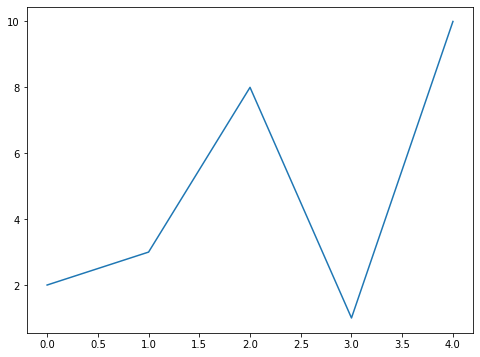

In [ ]:
plt.figure()
plt.plot([2, 3, 8, 1, 10]) # for line plots, we can pass lists, arrays, series
plt.show()

We can also use data from a dataframe to make  plots. Let's plot out the `test_score` column:

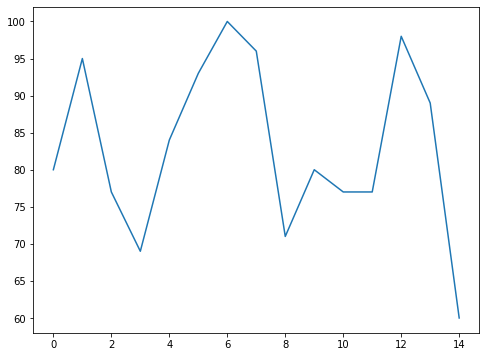

In [ ]:
plt.figure()
plt.plot(data['test_score']) 
plt.show();

Every time we make a visualization, we have to make sure that all of the information needed is included with the plots. This includes a title, axis labels, legends, etc. 

Let's add some more information to our plot above using some Matplotlib methods.

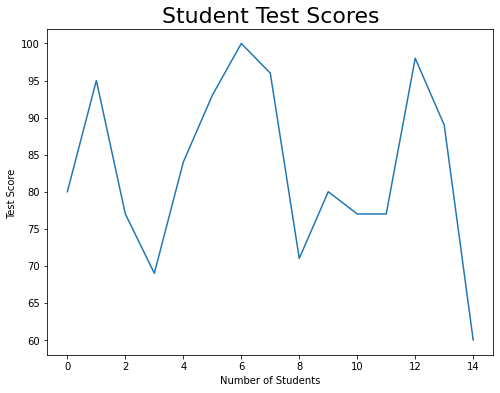

In [ ]:
plt.figure()
plt.plot(data['test_score']) 
plt.title('Student Test Scores', fontsize=22) # adding a title
plt.ylabel('Test Score ') # adding a label for the y-axis
plt.xlabel('Number of Students') # adding a label for the x-axis 
plt.show() 

Matplotlib has a lot of flexibility so we can easily change the type of plot we can make. By changing the command that comes after `plt.`, we can create many kinds of visualizations. Some common ones include:

    plt.plot # line plot
    plt.scatter
    plt.hist
    plt.bar
    plt.boxplot
  

### **Scatter Plots**
Scatter plots are great for understanding the relationship between two columns/variables. The general syntax is: 

    plt.figure()
    plt.scatter( x_data, y_data )
    plt.show()

Let's make a scatter plot using the test score and minutes studied.

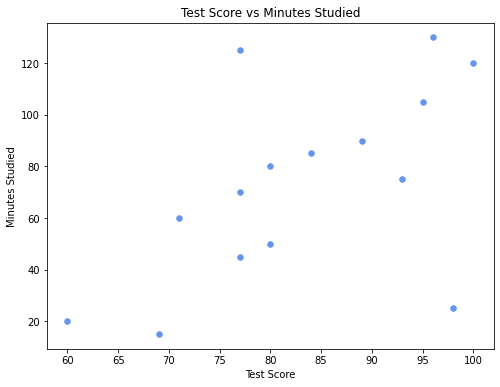

In [ ]:
plt.figure()
plt.scatter(data['test_score'], data['minutes_studied'], color='cornflowerblue', s=30)
plt.xlabel('Test Score')
plt.ylabel('Minutes Studied')
plt.title('Test Score vs Minutes Studied')
plt.show()

### **Histogram**
A histogram is a graphical display that uses rectangular bars to show the frequency distribution of a set of numerical data. The histogram enables us to visualize the underlying distribution pattern of our data.

Let's make a histogram of the test score column. A histogram is going to have the following syntax: 
    
    plt.figure()
    plt.hist(data, bins )
    plt.show()

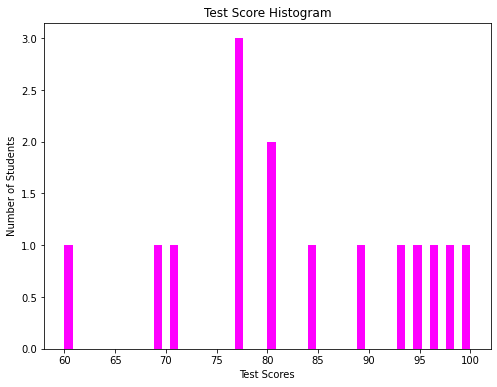

In [ ]:
plt.figure()
plt.hist(data['test_score'], bins=50, color='magenta')
plt.xlabel('Test Scores')
plt.ylabel('Number of Students')
plt.title('Test Score Histogram')
plt.show()

### **Bar Charts**

Bar Chart is another effective graphical display for categorical data. A bar chart is a graphical display to show the number of occurrences or frequency for each categorical data using bars.

The general syntax for a bar chart is:

    plt.figure()
    plt.bar( bar_names, bar_heights )
    plt.show()

We can make a simple bar chart using some toy data.

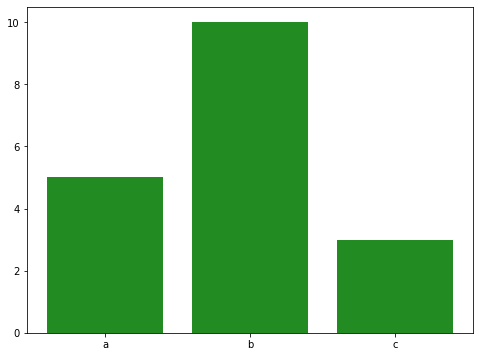

In [ ]:
plt.figure()
plt.bar(['a','b','c'], [5, 10, 3], color='forestgreen')
plt.show()

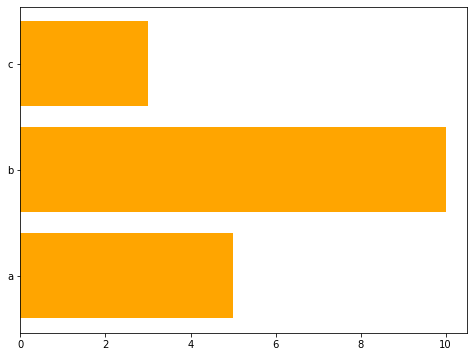

In [ ]:
plt.figure()
plt.barh(['a','b','c'], [5, 10, 3], color='orange')
plt.show()

Let's make some bar plots using our data. Let's say we want to plot how frequently students received test scores.

We can use the `value_counts()` method in Pandas to get a frequency count for each. 

In [ ]:
# using value_counts() on our industry column
print(data['test_score'].value_counts())

77     3
80     2
95     1
60     1
96     1
89     1
71     1
69     1
84     1
93     1
98     1
100    1
Name: test_score, dtype: int64


Since `value.counts()` outputs a series object, we can get the test scores by using `.index` and we can get the frequency counts by using `.values`. 

In [ ]:
print('labels: ', data['test_score'].value_counts().index )

labels:  Int64Index([77, 80, 95, 60, 96, 89, 71, 69, 84, 93, 98, 100], dtype='int64')


In [ ]:
print('values: ', data['test_score'].value_counts().values )

values:  [3 2 1 1 1 1 1 1 1 1 1 1]


We can use these 2 items to create our frequency bar chart:

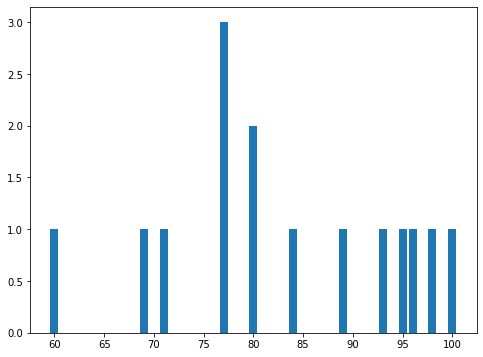

In [ ]:
plt.figure()
plt.bar(data['test_score'].value_counts().index, data['test_score'].value_counts().values)
plt.show()

### **Pie Chart**

Pie Chart is a simple graphical way to show the numerical proportion of categorical data in a dataset. A Pie Chart is also known as Circular Chart (Source: Wikipedia) which is divided into wedge-shaped pieces. The arc length of each piece is proportional to the relative frequency of the categorical data.

In [ ]:
x, y, z = 128, 256, 1024

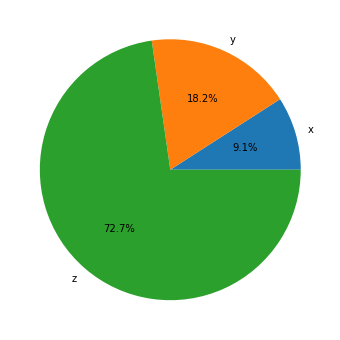

In [ ]:
fig, ax = plt.subplots()
ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
plt.show()

## **Congrats! You completed the second stats lesson 🎉**